In [ ]:
# imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
#### CS 260 Final Project - Spring 2022
---

# University Rankings

### By: Joanna Fair, Cody Turpin, Austin Tran

**Introduction**

For this project, our group mainly explored how private and public schools performed to aid in the decision making for college applicants.

We asked the following questions in order to discover relationships between variables:

1. Do private schools have a higher in-state tuition than public schools?
1. Does the numerical rank of the university increase as the acceptance rate increases for public and/or private school?
1. Is there a relationship between the school's type (public/private) and the freshman retention rate? (i.e. do public or private schools tend to have higher freshman retention rates?) We used rank to explore this relationship as well.
1. Is there a relationship between the school's type and its 6 year graduation rate? (i.e. do public / private schools tend to have higher / lower 6 year graduation rates?) We used rank to explore this relationship as well.
1. Does school rank and 6 year graduation rate have a negative correlation, and do we see the same results for public / private schools?

Each of these questions allowed us to determine a difference/similarity  between public and private universities. In summary, our results showed that in general, private schools perform better than public schools in terms of rank, freshman retention rate, and 6 year graduation rate, but at the cost of being significantly more expensive.

**Data:**

In [ ]:
rankings = pd.read_csv('https://raw.githubusercontent.com/Cody011/CS260Project/main/US%20News%20National%20University%20Rankings.csv')
rankings

,Rank,University,City,State,Type,Tuition_in_state,Tuition_out_of_state,Enrollment,Acceptance_rate,Freshman_retention_rate,6yr_Grad_rate
0,1,Princeton University,Princeton,NJ,Private,41820,41820,8014.0,7.4,98,97
1,2,Harvard University,Cambridge,MA,Private,43938,43938,19882.0,5.8,97,97
2,3,Yale University,New Haven,CT,Private,45800,45800,12109.0,6.9,99,98
3,4,Columbia University,New York,NY,Private,51008,51008,23606.0,6.9,99,96
4,5,Stanford University,Stanford,CA,Private,44757,44757,18136.0,5.7,98,96
...,...,...,...,...,...,...,...,...,...,...,...
197,198,University of Montana,Missoula,MT,Public,6330,23146,12058.0,95.7,73,48
198,199,University of Nevada Reno,Reno,NV,Public,6415,20325,18776.0,84.3,79,51
199,200,Utah State University,Logan,UT,Public,6384,18491,27812.0,98.5,70,51
200,201,Louisiana Tech University,Ruston,LA,Public,8052,22635,11015.0,67.4,77,50


In [ ]:
private = pd.read_csv('https://raw.githubusercontent.com/Cody011/CS260Project/main/Private%20Rankings.csv')
private

,Rank,University,City,State,Type,Tuition_in_state,Tuition_out_of_state,Enrollment,Acceptance_rate,Freshman_retention_rate,6yr_Grad_rate
0,1,Princeton University,Princeton,NJ,Private,41820,41820,8014.0,7.4,98,97
1,2,Harvard University,Cambridge,MA,Private,43938,43938,19882.0,5.8,97,97
2,3,Yale University,New Haven,CT,Private,45800,45800,12109.0,6.9,99,98
3,4,Columbia University,New York,NY,Private,51008,51008,23606.0,6.9,99,96
4,5,Stanford University,Stanford,CA,Private,44757,44757,18136.0,5.7,98,96
...,...,...,...,...,...,...,...,...,...,...,...
79,80,Edgewood College,Madison,WI,Private,25590,25590,2894.0,76.6,80,57
80,81,Immaculata University,Immaculata,PA,Private,30740,30740,3675.0,81.9,82,48
81,82,Spalding University,Louisville,KY,Private,22425,22425,NaN,29.3,73,42
82,83,St. Mary's University of Minnesota,Winona,MN,Private,30315,30315,5528.0,74.9,77,55


In [ ]:
public = pd.read_csv('https://raw.githubusercontent.com/Cody011/CS260Project/main/Public%20Rankings.csv')
public

,Rank,University,City,State,Type,Tuition_in_state,Tuition_out_of_state,Enrollment,Acceptance_rate,Freshman_retention_rate,6yr_Grad_rate
0,1,University of California Berkeley,Berkeley,CA,Public,13844,25064,36204,17.7,97,91
1,2,University of California Los Angeles,Los Angeles,CA,Public,12702,35580,42190,20.4,97,90
2,3,University of Virginia,Charlottesville,VA,Public,12998,42184,23464,30.1,97,93
3,4,University of Michigan Ann Arbor,Ann Arbor,MI,Public,13977,41811,43710,33.3,97,90
4,5,University of North Carolina Chapel Hill,Chapel Hill,NC,Public,8374,33624,29127,26.7,97,90
...,...,...,...,...,...,...,...,...,...,...,...
113,114,University of Montana,Missoula,MT,Public,6330,23146,12058,95.7,73,48
114,115,University of Nevada Reno,Reno,NV,Public,6415,20325,18776,84.3,79,51
115,116,Utah State University,Logan,UT,Public,6384,18491,27812,98.5,70,51
116,117,Louisiana Tech University,Ruston,LA,Public,8052,22635,11015,67.4,77,50


A direct link to the data can be found at the following website. 
 * https://www.statcrunch.com/app/index.html?dataid=1169157 
 
According the website, the data was collected via the rankings listed by US News & World Report's Best Colleges Rankings they list every year. Specifically the data was pulled from the 2014 rankings and is a collection of 280 colleges and universities out of 1,466 U.S. "bachelor's degree-granting instutitions" based on "17 measures of academic quality," 7 of which are utilized in our dataset. These schools were surveyed in the spring and summer of 2013 and are ranked by applying weights to each variable to normalize their score and generate their overall rank.

The data was modified by us to breakout the data into three datasets, the main one, one for private, and one for public schools. The purpose of this was to allow for more seamless comparisons between private and public schools.

Below is a list of each variable in the dataset and its explanation.

* **Rank:** the rank of the university compared to other universites in the United States (the rankings for public and private dataset have been separated out and separately ranked in their respective categories)
* **University:** the name of the university
* **City:** the city that the university is located within
* **State:** the state that the university is located within
* **Type:** the type of the university (public or private)
* **Tuition in State:** the dollar amount it costs to attend the university each year from within the same state
* **Tuition out of State:** the dollar amount it costs to attend the university each year from another state
* **Enrollment:** the number of students who enrolled at the university
* **Acceptance rate:** the percentage of students who were accepted into the university
* **Freshman retention rate:** the percentage of freshmen who continue enrollment at the university
* **6yr Grad rate:** the percentage of students who graduated from the university within 6 years

**Results:**

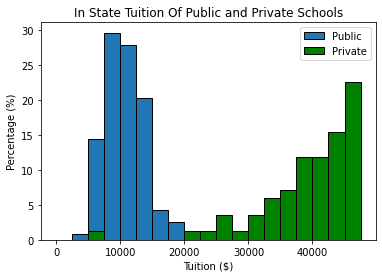

In [ ]:
n1 = len(public)
multipliers_public = np.ones(n1)*100/n1
bin_info_public = plt.hist(public['Tuition_in_state'], edgecolor = 'black', bins = np.arange(0,50000,2500), weights = multipliers_public)

n2 = len(private)
multipliers_private = np.ones(n2)*100/n2
bin_info_private = plt.hist(private['Tuition_in_state'], edgecolor = 'black', bins = np.arange(0,50000,2500), weights = multipliers_private, color = 'green')

plt.legend(['Public','Private'])
plt.xlabel('Tuition ($)')
plt.ylabel('Percentage (%)')
plt.title('In State Tuition Of Public and Private Schools');

We begin our results section with this histrogram which showed us that, before aid and scholarships, private schools were signficantly more expensive than public schools. Private schools were also skewed left, showing that there likely is a difference at least for private schools between pre-aid and post-aid tuition costs. Public schools on the other hand were found to have a bell-shaped curve with a high positive kurtosis. We can infer that because public schools don't give out aid as significantly as private schools it's probable that the public school tuition cost pre-aid will similarly resemble the private cost post-aid if we had the data on those figures. A critique we have given ourselves was that we should have also looked into the out of state tuition, since this graph nor any other graph we have examines that variable.

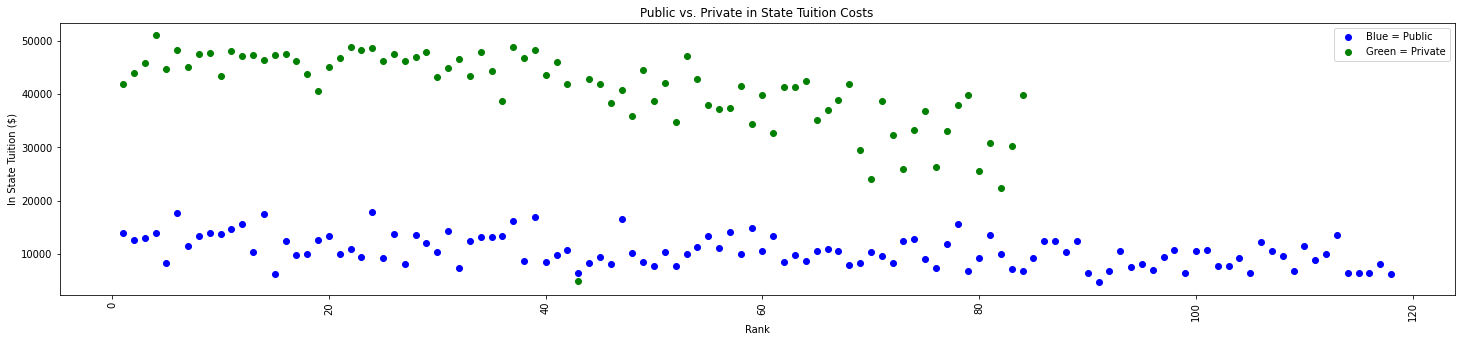

In [ ]:
plt.figure(figsize =(25,5))
plt.scatter(public["Rank"], public["Tuition_in_state"], color = "blue", label = "Blue = Public")
plt.scatter(private["Rank"], private["Tuition_in_state"], color = "green", label = "Green = Private")
plt.legend()
plt.xlabel("Rank")
plt.ylabel("In State Tuition ($)")
plt.title("Public vs. Private in State Tuition Costs")
plt.xticks(rotation = 90);

We wanted to continue looking at the in state tuition costs, so this graph shows the relationship between the rank of the university and the in state tuition costs, colored by type of university. We learn that public universities have the highest (worst) ranks, but the lower half of the ranks are split between both types of universities.

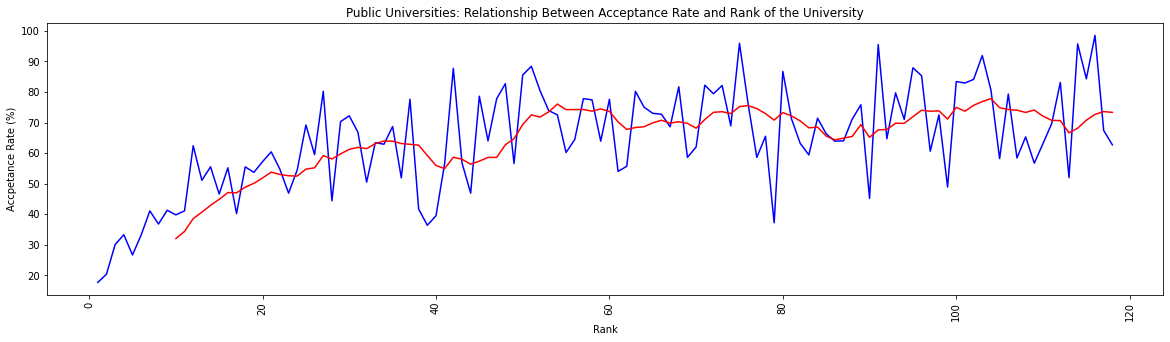

In [ ]:
public["Rolling_average_acceptance_rate"] = public["Acceptance_rate"].rolling(10).mean()
private["Rolling_average_acceptance_rate"] = private["Acceptance_rate"].rolling(10).mean()

plt.figure(figsize = (20,5))
plt.plot(public["Rank"], public["Acceptance_rate"], color = "blue")
plt.plot(public["Rank"], public["Rolling_average_acceptance_rate"], color = "red")
plt.xlabel("Rank")
plt.ylabel("Accpetance Rate (%)")
plt.title("Public Universities: Relationship Between Acceptance Rate and Rank of the University")
plt.xticks(rotation = 90);

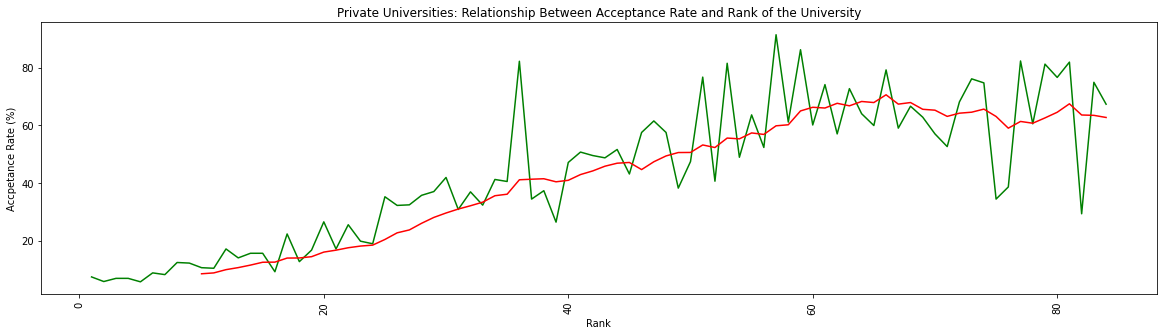

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(private["Rank"], private["Acceptance_rate"], color = "green")
plt.plot(private["Rank"], private["Rolling_average_acceptance_rate"], color = "red")
plt.xlabel("Rank")
plt.ylabel("Accpetance Rate (%)")
plt.title("Private Universities: Relationship Between Acceptance Rate and Rank of the University")
plt.xticks(rotation = 90);

After noticing the clear difference in rank based on type of university, we wanted to explore how the acceptance rate might differ based on the rank. We found that as the rank of a school got lower (as in the numerial rank got bigger) the acceptance rate increased as well. This told us that the most prestigious higher ranked schools were harder to get into regardless if they were public or private institutions. We found interesting that the rolling average for private institutions was essentially a straight increasing line whereas with public institutions it dips a couple times and even flattens out towards the end. This told us that it's possible that rank and acceptance rate is more consistent for private institutions than it is for public meaning that, in the case of public schools, students applying to lower ranked schools may not have to consider acceptance rate as a big factor in their decision since many will have similar acceptance rates.

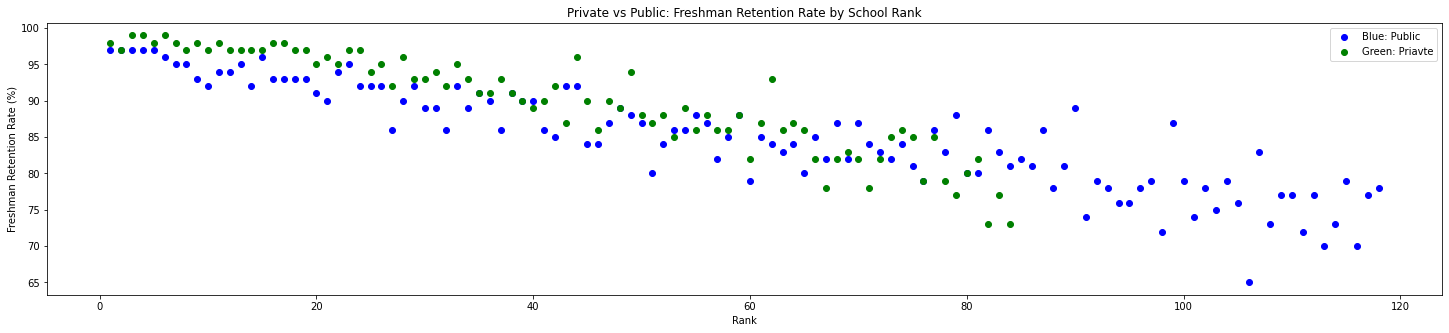

In [ ]:
plt.figure(figsize = (25,5))
plt.scatter(public['Rank'], public['Freshman_retention_rate'], color  = "blue", label = "Blue: Public")
plt.scatter(private['Rank'], private['Freshman_retention_rate'], color  = "green", label = "Green: Priavte")
plt.title("Private vs Public: Freshman Retention Rate by School Rank")
plt.xlabel("Rank")
plt.ylabel("Freshman Retention Rate (%)")
plt.legend();

Since the acceptance rate clearly increased as the rank of the university increased, we wondered if there would also be a clear relationship between the rank and the freshman retention rate. This scatterplot shows that our hypothesis is likley true. There is a negative correlatoion between the rank of the unuversity and the freshman retention rate, true for both public and private universities.

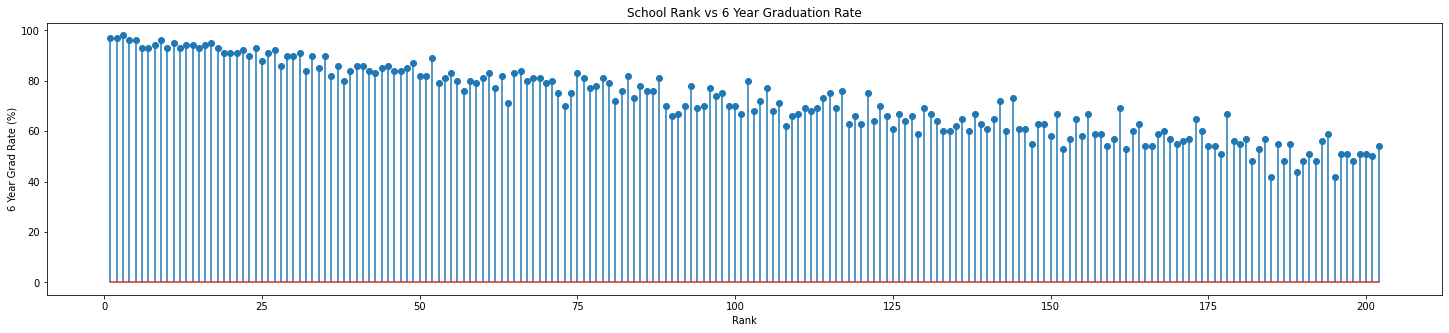

In [ ]:
plt.figure(figsize =(25,5))
plt.stem(rankings['Rank'], rankings['6yr_Grad_rate'], use_line_collection = True)
plt.xlabel("Rank")
plt.ylabel("6 Year Grad Rate (%)")
plt.title('School Rank vs 6 Year Graduation Rate')
plt.show()

We thought of 6 year grad rate as the next step after freshman retention rate in analyzing the relationship between rank. This loliplot graph shows us that as the rank of the university increases (worsesns) the 6 year graduation rate decreases. This tells us that the better the university, the better the 6 year graduation rate. Although the color isnt specific to each type (could not fugire it out in a loliplot graph) from the previous graphs we know that the left hadn side is a mix of public and private, and the right hand side is mostly public. From this we can see that both public and private universities have a neagtive relationship when it comes to rank and 6 year grad rate.

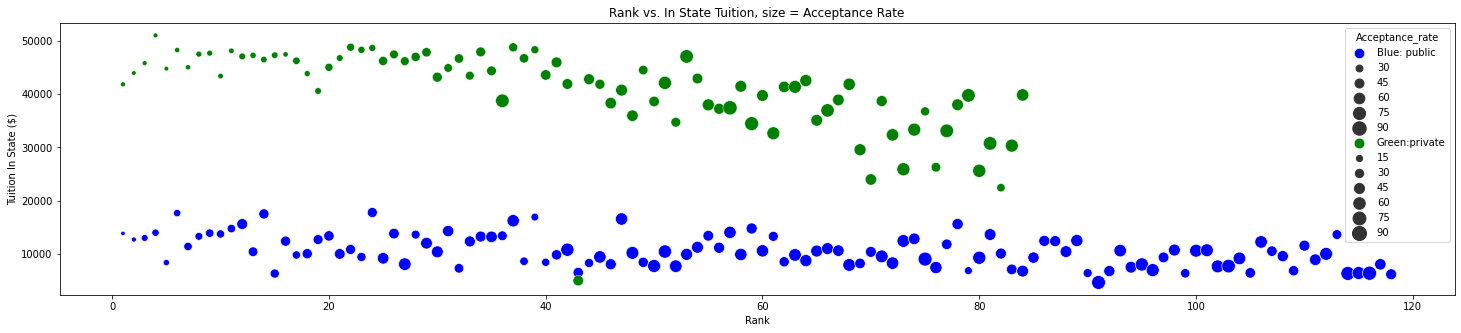

No handles with labels found to put in legend.


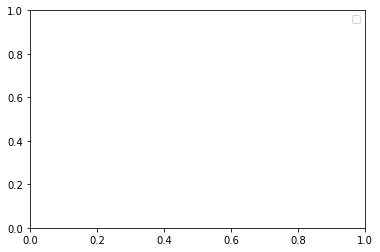

In [ ]:
plt.figure(figsize = (25,5))
sns.scatterplot(data=public, x="Rank", y="Tuition_in_state", size="Acceptance_rate", sizes=(20, 200), color = "blue", label = "Blue: public")
sns.scatterplot(data=private, x="Rank", y="Tuition_in_state", size="Acceptance_rate", sizes=(20, 200), color = "green", label = "Green:private")
plt.title("Rank vs. In State Tuition, size = Acceptance Rate")
plt.xlabel("Rank")
plt.ylabel("Tuition In State ($)")
plt.show()
plt.legend();

Our final graph is similar to our second one, but we decided to add another variable; acceptance rate. We learn a lot from this bubble plot. First it is evident that private schools have a higher in state tuition, which we learned from our second graph as well. Second, it appears that in general, the oublic universities have higher acceptance rates. Third, the public points look to be more spread out, so we can infer that the standard deviation of rank is larger. Lastly, we see that the lower acceptance rates correlate to a better ranking for both public and private universities.

**Conclusion**

After creating multiple graphs we have found that at the end of the day students who are applying to universities should focus on the rankings of schools provided by US News & World Report for Best Colleges each year since that appears to encompass serveral key decision statistics and be a strong indicator of the quality of the institution. We originally thought that we would find these differences between private and public institutions but instead it was the rankings that mattered more, obviously due to the way the data was collected. The time when a decision between private and public should be made is with before aid tuition cost, as the type of school had a significant factor on the outcome of the pre-aid cost.

In the future we would like to compare the after-aid cost to attend private and public schools and see if there is a significant difference between the two simiar to the one we see in this data set. Of course, that requires additional variables that we do not have with this data set. Perhaps one day we will find data like that that we can incorporate into our data set and make those comparisons. 

If we had more time, we would have considered the out of state tuition variable and compared it to the in state tuition. We also would have grouped by state or city and looked into the potential differences. 